**TASK:Exploratory Data Analysis (EDA)**

### Questions to be analysis from this dataset.

1.  **Who Buys Bikes?**
    * What is the demographic profile of customers who purchased a bike?

2.  **Does Money Matter?**
    * Is there a relationship between a customer's Income and their likelihood of purchasing a bike?

3.  **Does Home Ownership Influence Purchase?**
    * Are homeowners more or less likely to buy a bike compared to non-homeowners?

4.  **What About Cars?**
    * Is there a correlation between the number of Cars a person owns and their decision to buy a bike?

5.  **Where Are the Customers?**
    * Which Region has the highest number of bike purchasers?





### Step1-Importing Libraries and dataset.

In [29]:
import pandas as pd
import numpy as np

In [30]:
data=pd.read_csv("/content/Data1.csv")
#to know starting rows
data.head()

,ID,Married Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brakets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
3,11292,Single,Male,150000,1,Partial College,Professional,No,3,0-1 Miles,North America,44,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


### Step2-Exploring Data Structure.




In [31]:
#basic information about data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                366 non-null    int64 
 1   Married Status    366 non-null    object
 2   Gender            366 non-null    object
 3   Income            366 non-null    int64 
 4   Children          366 non-null    int64 
 5   Education         366 non-null    object
 6   Occupation        366 non-null    object
 7   Home Owner        366 non-null    object
 8   Cars              366 non-null    int64 
 9   Commute Distance  366 non-null    object
 10  Region            366 non-null    object
 11  Age               366 non-null    int64 
 12  Age Brakets       366 non-null    object
 13  Purchased Bike    366 non-null    object
dtypes: int64(5), object(9)
memory usage: 40.2+ KB


### Step3- Identifying trends,patterns and anamolies within data.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

1.Identifying Patterns and Trends with a Scatter Plot.

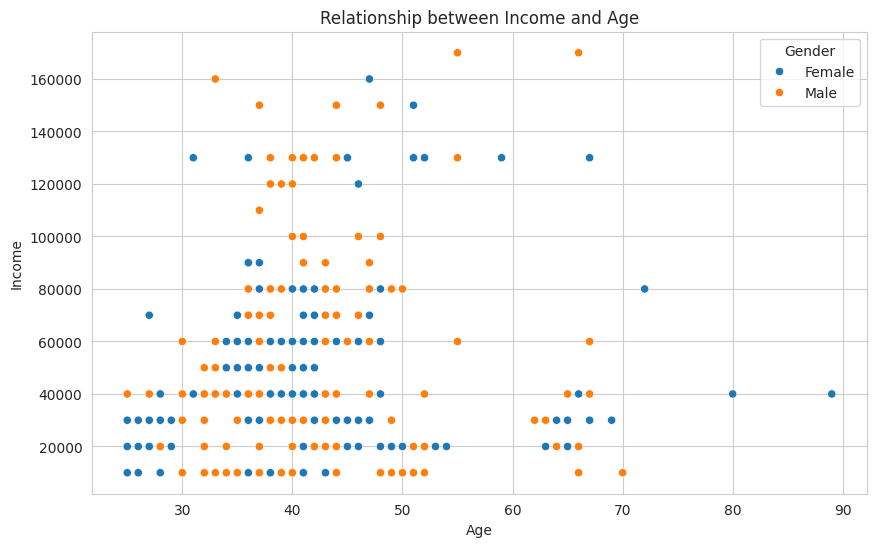

In [33]:
#style
sns.set_style("whitegrid")

# Create a scatter plot of Income vs Age to identify patterns or trends
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income',hue='Gender', data=data)
plt.title('Relationship between Income and Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

2.Detecting Anomalies with a Box Plot.

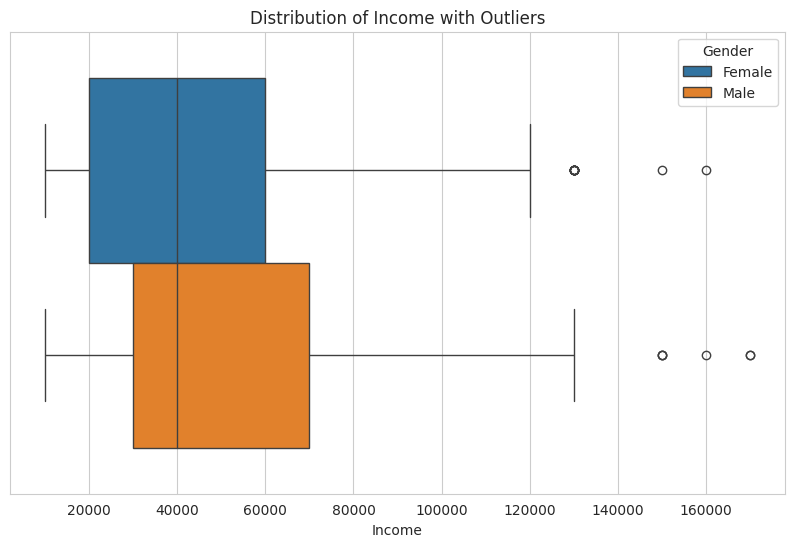

In [34]:
# Create a box plot of Income to identify anomalies (outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Income'],hue='Gender',data=data)
plt.title('Distribution of Income with Outliers')
plt.xlabel('Income')
plt.show()

3.Finding Patterns in Categorical Data with a Bar Chart.

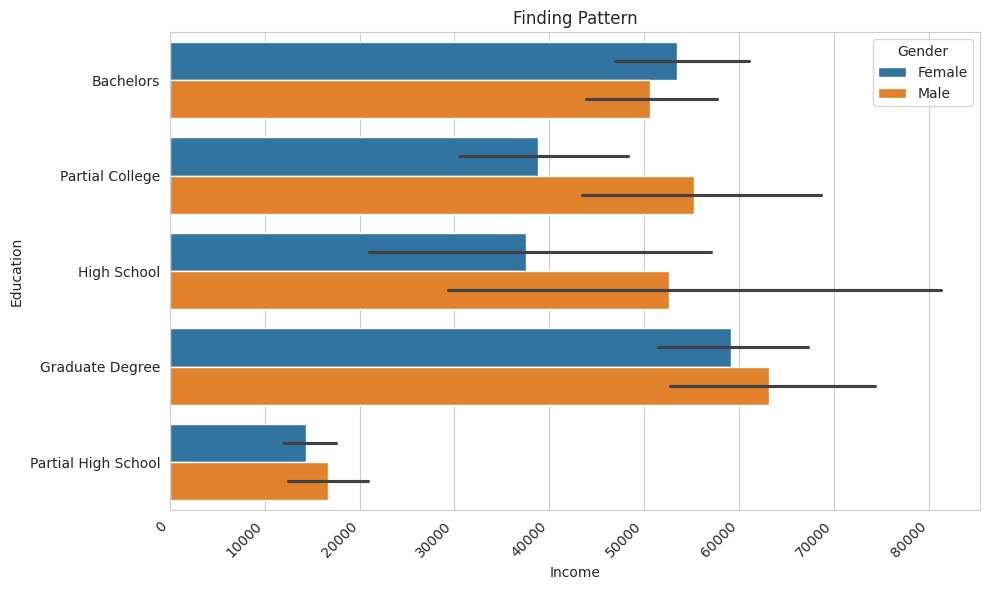

In [35]:
# Create a bar chart of Income
plt.figure(figsize=(10, 6))
sns.barplot(x="Income",y="Education",hue='Gender',data=data)
plt.title('Finding Pattern')
plt.xlabel("Income")
plt.ylabel('Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step5- Finding Answers.
(To find answers of this questions, I will use various graph and a brief explanation.)


1.  **Who Buys Bikes?**
    * What is the demographic profile of customers who purchased a bike?

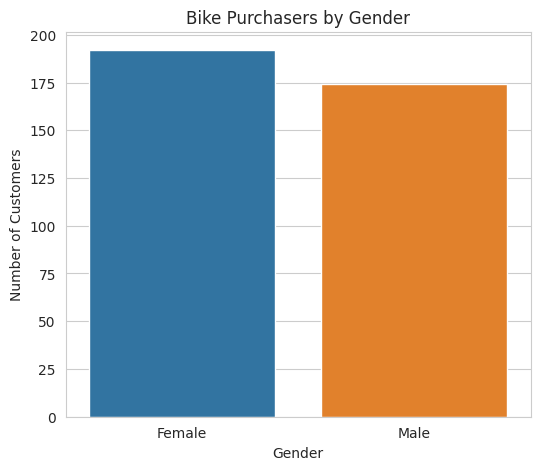

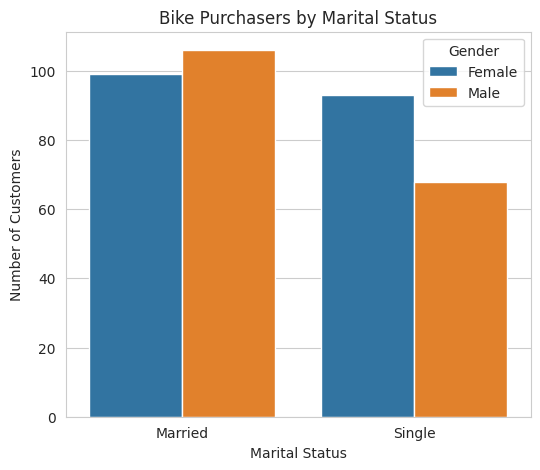

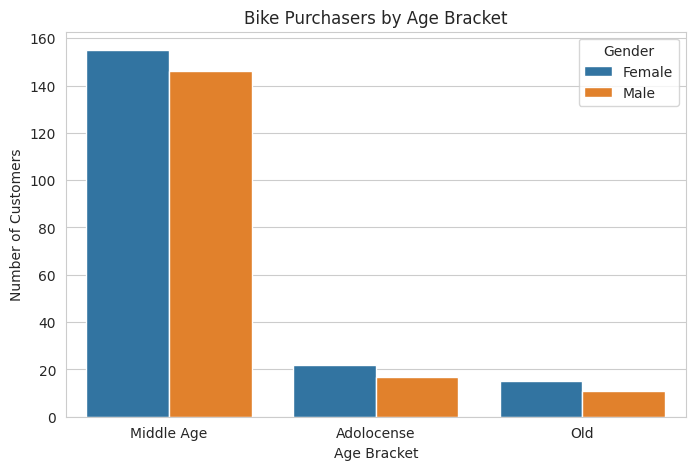

In [36]:
#Gender distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender',hue='Gender', data=data)
plt.title('Bike Purchasers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

#Married Status
plt.figure(figsize=(6, 5))
sns.countplot(x='Married Status',hue='Gender', data=data)
plt.title('Bike Purchasers by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

#Bike Purchasers by Age Bracket
plt.figure(figsize=(8, 5))
sns.countplot(x='Age Brakets',hue='Gender', data=data, order=data['Age Brakets'].value_counts().index)
plt.title('Bike Purchasers by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Customers')
plt.show()

**Ans.**

By above analysis it is clear that,the typical customer who purchases a bike is a middle-aged female who is single. While females slightly outnumber males, the biggest differentiator is age, with the Middle Age bracket accounting for the vast majority of purchases.

2.  **Does Money Matter?**
    * Is there a relationship between a customer's Income and their likelihood of purchasing a bike?

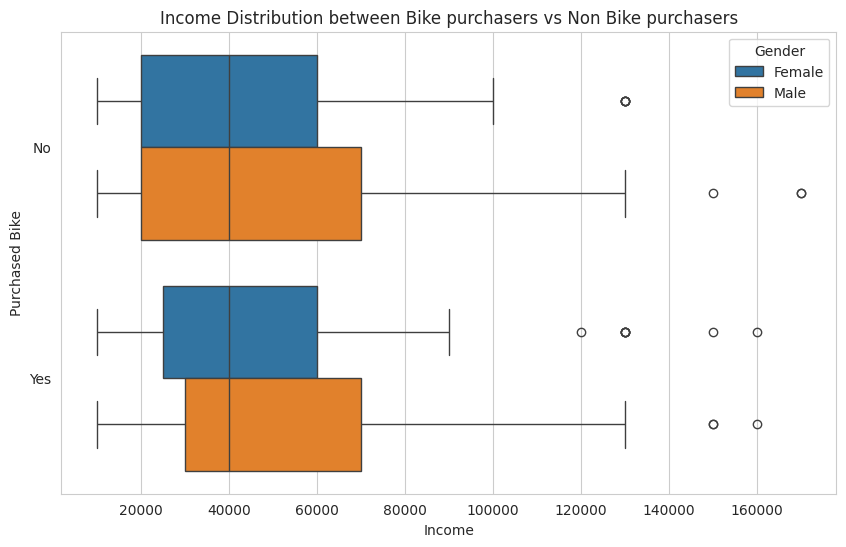

In [37]:
#Income Distribution between Bike purchasers vs Non Bike purchasers.
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Income'],y=data['Purchased Bike'],hue='Gender',data=data)
plt.title('Income Distribution between Bike purchasers vs Non Bike purchasers')
plt.xlabel('Income')
plt.ylabel("Purchased Bike")
plt.show()

In [38]:
# Calculate the mean and median income for each group (Purchased Bike Yes/No)
income_summary = data.groupby('Purchased Bike')['Income'].agg(['mean', 'median'])

# Print the summary statistics
print("Income summary by bike purchase status:")
print(income_summary.to_markdown(numalign="left", stralign="left"))

Income summary by bike purchase status:
| Purchased Bike   | mean    | median   |
|:-----------------|:--------|:---------|
| No               | 47891.6 | 40000    |
| Yes              | 50950   | 40000    |


**Ans.**

Yes, there is a relationship between a customer's income and their likelihood of purchasing a bike. The analysis shows that the **average income of bike purchasers is slightly higher** ($50,950) compared to those who did not purchase a bike.

However, it is important to note that the **median income is the same** for both groups ($40,000). This suggests that while high-income earners are more likely to purchase a bike, a significant portion of bike purchases come from the same income bracket as non-purchasers.

3.  **Does Home Ownership Influence Purchase?**
    * Are homeowners more or less likely to buy a bike compared to non-homeowners?

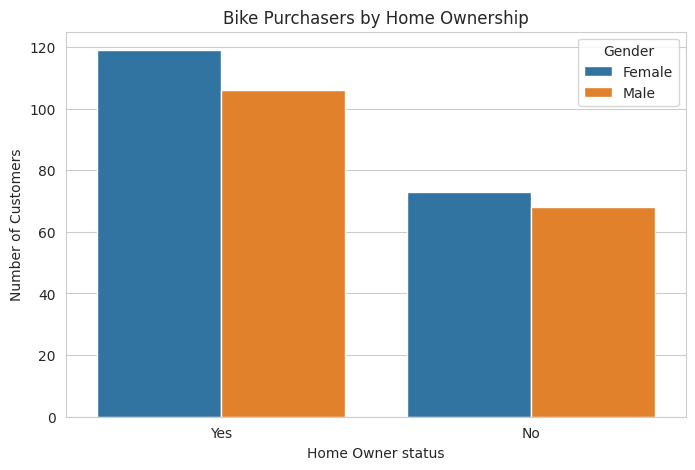

In [39]:
#Ownership Influence Purchase
plt.figure(figsize=(8, 5))
sns.countplot(x='Home Owner',hue='Gender', data=data)
plt.title('Bike Purchasers by Home Ownership')
plt.xlabel('Home Owner status')
plt.ylabel('Number of Customers')
plt.show()

**Ans.**
Yes, home ownership appears to have a positive correlation with the purchase of a bike.

The analysis shows that:

59.5% of all bike purchasers are homeowners.

40.5% of all bike purchasers are not homeowners.

The above chart  visually confirms this, showing a larger number of bike purchasers who own their homes.

4.  **What About Cars?**
    * Is there a correlation between the number of Cars a person owns and their decision to buy a bike?

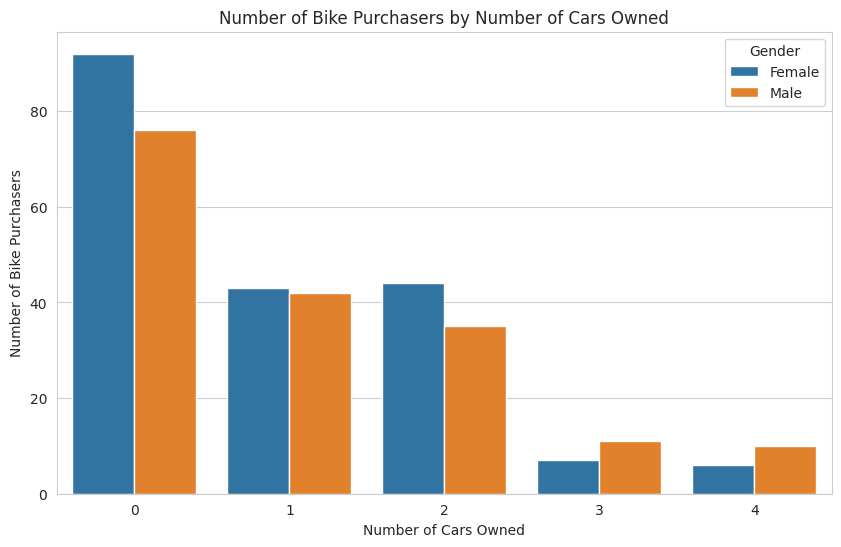

In [40]:
#bike puchasers by cars
plt.figure(figsize=(10, 6))
sns.countplot(x='Cars',hue='Gender', data=data)
plt.title('Number of Bike Purchasers by Number of Cars Owned')
plt.xlabel('Number of Cars Owned')
plt.ylabel('Number of Bike Purchasers')
plt.show()

**Ans.**
There is a clear relationship between the number of cars a person owns and their decision to buy a bike. The data shows that the most significant group of bike purchasers owns zero cars.

80 customers who purchased a bike own no cars, which is the highest count among all groups.

The number of bike purchasers decreases significantly as the number of cars owned increases.

The above chart below visually confirms this trend, showing a sharp drop-off in bike purchases as the number of cars goes from zero to four.


5.  **Where Are the Customers?**
    * Which Region has the highest number of bike purchasers?

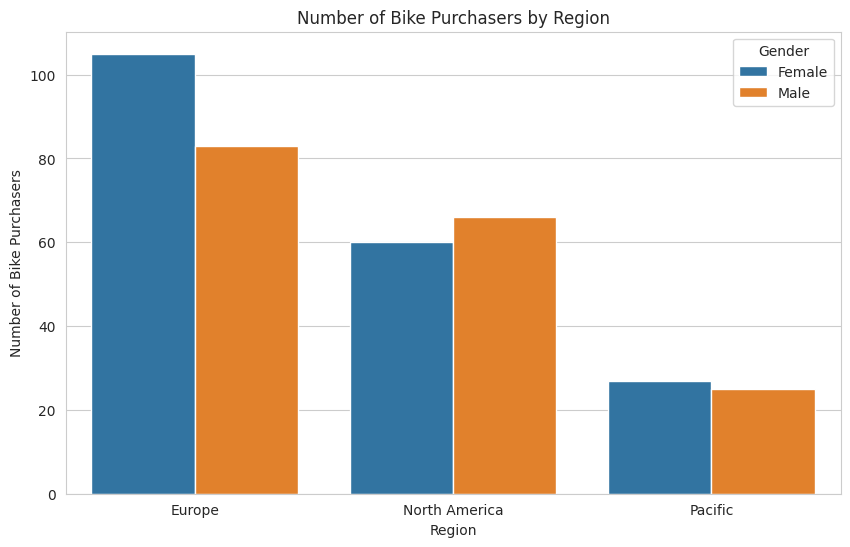

In [41]:
#Number od Bike purchase by Region.
plt.figure(figsize=(10, 6))
sns.countplot(x='Region',hue='Gender',data=data)
plt.title('Number of Bike Purchasers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Bike Purchasers')
plt.show()

**Ans.**
Bike purchasers are not evenly distributed across the different regions in your dataset. The Europe region has the highest number of bike purchasers by a significant margin.

Europe has 105 bike purchasers.

North America has 57 bike purchasers.

The Pacific region has 38 bike purchasers.